In [14]:
import tensorflow as tf
from tensorflow import keras
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt 
from keras.layers import Dropout, Flatten, Dense
from tensorflow.keras import models, layers
from keras.preprocessing import image

In [15]:
data= "C:/Users/canse/OneDrive/Masaüstü/datasetkedi/datasetkedi"

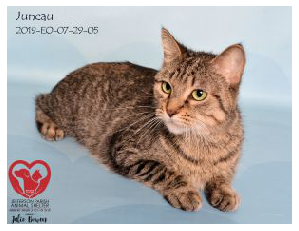

In [20]:
img= load_img("OneDrive/Masaüstü/datasetkedi/datasetkedi/Tabby/46026809_9994.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.3) 

train_generator = train_datagen.flow_from_directory(data,
                                                    target_size=(224, 224),
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    subset='training') 

validation_generator = train_datagen.flow_from_directory(data, 
                                                            target_size=(224, 224),
                                                            batch_size=64,
                                                            class_mode='categorical',
                                                            subset='validation')

Found 16802 images belonging to 8 classes.
Found 7200 images belonging to 8 classes.


In [6]:
vgg = VGG19(weights = "imagenet",include_top = False,input_shape=(224,224,3))

for layer in vgg.layers:
    layer.trainable= False
  
 x = vgg.output
x = Flatten()(x)
x = Dense(units=4096, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(8,activation= "softmax")(x)

In [7]:
model=Model(inputs=vgg.input,outputs=predictions)

In [8]:
model.compile(loss="categorical_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

In [9]:
vgg_hist=model.fit(train_generator,
                   validation_data=validation_generator,
                   validation_steps=50,
                   epochs=100,
                   steps_per_epoch=50,
                   batch_size=64)
                   
                  




model.save("OneDrive/Masaüstü/kedi_vgg19_modeli/vgg19_modeli_kedi_siniflandirma.h5")

Epoch 1/100
50/50 [==============================] - 915s 18s/step - loss: 4.4035 - accuracy: 0.2428 - val_loss: 5.3247 - val_accuracy: 0.2519
Epoch 2/100
50/50 [==============================] - 897s 18s/step - loss: 2.3792 - accuracy: 0.3080 - val_loss: 4.4381 - val_accuracy: 0.2678
Epoch 3/100
50/50 [==============================] - 897s 18s/step - loss: 2.0607 - accuracy: 0.3316 - val_loss: 3.7036 - val_accuracy: 0.2731
Epoch 4/100
50/50 [==============================] - 897s 18s/step - loss: 1.9559 - accuracy: 0.3311 - val_loss: 3.2453 - val_accuracy: 0.2509
Epoch 5/100
50/50 [==============================] - 898s 18s/step - loss: 1.8105 - accuracy: 0.3651 - val_loss: 2.5346 - val_accuracy: 0.2837
Epoch 6/100
50/50 [==============================] - 895s 18s/step - loss: 1.7786 - accuracy: 0.3708 - val_loss: 2.5430 - val_accuracy: 0.2788
Epoch 7/100
50/50 [==============================] - 900s 18s/step - loss: 1.7640 - accuracy: 0.3766 - val_loss: 2.3300 - val_accuracy: 0.2700

In [108]:
from tensorflow.keras import models, layers
model = tf.keras.models.load_model("OneDrive/Masaüstü/kedi_vgg19_modeli/vgg19_modeli_kedi_siniflandirma.h5")

In [157]:
img = keras.preprocessing.image.load_img(
    "OneDrive/Masaüstü/kedi_siniflandirma_tahmin/tortoiseshell.jpg", target_size=(224,224)
)

In [158]:
img_array = keras.preprocessing.image.img_to_array(img)

In [159]:
img_array = tf.expand_dims(img_array, 0)

In [160]:
predict = model.predict(img_array)
predict=np.argmax(predict,axis=1)

In [161]:
print("Tahmin: ",predict)

Tahmin:  [7]


In [162]:
if predict == 0:
    print("Bu kedinin cinsi American Shorthair.",predict)
elif predict == 1:
    print("Bu kedinin cinsi Calico.",predict)
elif predict == 2:
    print("Bu kedinin cinsi Dilute Calico.",predict)
elif predict == 3:
    print("Bu kedinin cinsi Persian.",predict)
elif predict == 4:
    print("Bu kedinin cinsi Tabby.",predict)
elif predict == 5:
    print("Bu kedinin cinsi Torbie.",predict)
elif predict == 6:
    print("Bu kedinin cinsi Tortoiseshel.",predict)
elif predict== 7:
    print("Bu kedinin cinsi Tuxedo.",predict)


Bu kedinin cinsi Tuxedo. [7]
